In [24]:
import pandas as pd
stock_data=pd.read_csv('3D Objects/Python_Files/NFLX_dataset.csv')

In [26]:
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [30]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [32]:
stock_data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [34]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


<Axes: xlabel='Date'>

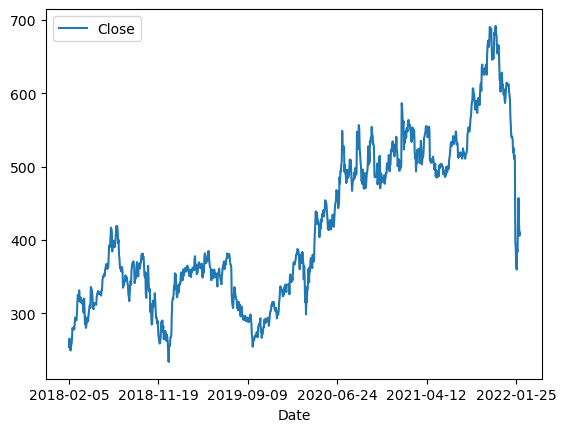

In [36]:
stock_data.plot(x='Date',y='Close')

In [38]:
input_data=stock_data.drop(columns=['Date','Close','Adj Close'])
output_data=stock_data['Close']

In [40]:
print(input_data.shape)
print(output_data.shape)

(1009, 4)
(1009,)


In [42]:
print(input_data)

            Open        High         Low    Volume
0     262.000000  267.899994  250.029999  11896100
1     247.699997  266.700012  245.000000  12595800
2     266.579987  272.450012  264.329987   8981500
3     267.079987  267.619995  250.000000   9306700
4     253.850006  255.800003  236.110001  16906900
...          ...         ...         ...       ...
1004  401.970001  427.700012  398.200012  20047500
1005  432.959991  458.480011  425.540009  22542300
1006  448.250000  451.980011  426.480011  14346000
1007  421.440002  429.260010  404.279999   9905200
1008  407.309998  412.769989  396.640015   7782400

[1009 rows x 4 columns]


In [44]:
from sklearn.model_selection import train_test_split
input_data_train,input_data_test,output_data_train,output_data_test=train_test_split(input_data,output_data,test_size=0.3)

In [53]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(input_data_train,output_data_train)

RandomForestRegressor()

In [55]:
stock_predict=model.predict(input_data_test)

In [57]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Mean absolute error:",(metrics.mean_absolute_error(stock_predict,output_data_test)))
print("Mean squared error:",(metrics.mean_squared_error(stock_predict,output_data_test)))
print("R2 score:",(metrics.r2_score(stock_predict,output_data_test)))

Mean absolute error: 3.882004014356391
Mean squared error: 27.93868845608773
R2 score: 0.997552982555058


In [67]:
print(input_data_test.tail(3))
input_random=input_data_test.tail(3)
input_random

           Open        High         Low   Volume
784  516.400024  517.900024  503.850006  4094500
286  361.000000  362.470001  350.369995  7852400
950  650.239990  665.820007  649.710022  2868300


,Open,High,Low,Volume
784,516.400024,517.900024,503.850006,4094500
286,361.000000,362.470001,350.369995,7852400
950,650.239990,665.820007,649.710022,2868300


In [69]:
print(output_data_test.tail(3))

784    504.790009
286    353.369995
950    657.580017
Name: Close, dtype: float64


In [71]:
stock_predict_test=model.predict(input_random)
stock_predict_test

array([509.65419423, 352.53850747, 657.59870168])